#Part1

In [ ]:
import torch
import torch.nn as nn
import torchvision.datasets as dsets
import torchvision.transforms as transforms

In [ ]:
# Hyperparameters
input_size = 32 * 32 * 3
hidden_size = 100
num_classes = 10
num_epochs = 5
batch_size = 100
learning_rate = 0.001

# CIFAR-10 dataset
train_dataset = dsets.CIFAR10(root='./data',
                                             train=True,
                                             transform=transforms.ToTensor(),
                                             download=True)

test_dataset = dsets.CIFAR10(root='./data',
                                            train=False,
                                            transform=transforms.ToTensor())

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

# Neural network model
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = NeuralNet(input_size, hidden_size, num_classes).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Train the model
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.reshape(-1, input_size).to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

# Test the model
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.reshape(-1, input_size).to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Accuracy of the network on the 10000 test images: {} %'.format(100 * correct / total))

100%|██████████| 170498071/170498071 [00:12<00:00, 13223943.52it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Epoch [1/5], Step [100/500], Loss: 1.9415
Epoch [1/5], Step [200/500], Loss: 1.9578
Epoch [1/5], Step [300/500], Loss: 1.7597
Epoch [1/5], Step [400/500], Loss: 1.8517
Epoch [1/5], Step [500/500], Loss: 1.7760
Epoch [2/5], Step [100/500], Loss: 1.8542
Epoch [2/5], Step [200/500], Loss: 1.6958
Epoch [2/5], Step [300/500], Loss: 1.7347
Epoch [2/5], Step [400/500], Loss: 1.7951
Epoch [2/5], Step [500/500], Loss: 1.6859
Epoch [3/5], Step [100/500], Loss: 1.7944
Epoch [3/5], Step [200/500], Loss: 1.6757
Epoch [3/5], Step [300/500], Loss: 1.6347
Epoch [3/5], Step [400/500], Loss: 1.5542
Epoch [3/5], Step [500/500], Loss: 1.5648
Epoch [4/5], Step [100/500], Loss: 1.5843
Epoch [4/5], Step [200/500], Loss: 1.4641
Epoch [4/5], Step [300/500], Loss: 1.6971
Epoch [4/5], Step [400/500], Loss: 1.6371
Epoch [4/5], Step [500/500], Loss: 1.4698
Epoch [5/5], Step [100/500], Loss: 1.5451
Epoch [5/5], Step [200/500], Loss: 1.5123
Epoch [5/5], Step [300/50

In [ ]:
import torch.nn.functional as F

'''import torch.nn.functional as F is an import statement that imports the functional module from PyTorch's nn (neural network) package and aliases it as F.

The functional module contains a variety of functions that are commonly used in neural network architectures, such as activation functions (F.relu(), F.sigmoid(), etc.), loss functions (F.cross_entropy(), F.mse_loss(), etc.), and more.

By importing F and using its functions, you can write more concise and readable code for your neural network models.'''

"import torch.nn.functional as F is an import statement that imports the functional module from PyTorch's nn (neural network) package and aliases it as F.\n\nThe functional module contains a variety of functions that are commonly used in neural network architectures, such as activation functions (F.relu(), F.sigmoid(), etc.), loss functions (F.cross_entropy(), F.mse_loss(), etc.), and more.\n\nBy importing F and using its functions, you can write more concise and readable code for your neural network models."

In [ ]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=128,
                                          shuffle=True, num_workers=2)

test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=128,
                                         shuffle=False, num_workers=2)

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model = Net().to(device)

In [ ]:
import torch.optim as optim

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

In [ ]:
for epoch in range(10):
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 2000 == 1999:
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

In [ ]:
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 33 %


#Part2 - Evaluating on CIFAR-100

In [ ]:
# Hyperparameters
input_size = 32 * 32 * 3
hidden_size = 100
num_classes = 100
num_epochs = 5
batch_size = 100
learning_rate = 0.001

# CIFAR-100 dataset
train_dataset_100 = dsets.CIFAR100(root='./data',
                                             train=True,
                                             transform=transforms.ToTensor(),
                                             download=True)

test_dataset_100 = dsets.CIFAR100(root='./data',
                                            train=False,
                                            transform=transforms.ToTensor())

# Data loader
train_loader_100 = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader_100 = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

# Neural network model
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = NeuralNet(input_size, hidden_size, num_classes).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Train the model
total_step = len(train_loader_100)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader_100):
        images = images.reshape(-1, input_size).to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

# Test the model
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader_100:
        images = images.reshape(-1, input_size).to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Accuracy of the network on the 10000 test images: {} %'.format(100 * correct / total))

100%|██████████| 169001437/169001437 [00:13<00:00, 12521790.40it/s]


Extracting ./data/cifar-100-python.tar.gz to ./data
Epoch [1/5], Step [100/400], Loss: 1.9056
Epoch [1/5], Step [200/400], Loss: 1.8978
Epoch [1/5], Step [300/400], Loss: 1.9517
Epoch [1/5], Step [400/400], Loss: 1.9969
Epoch [2/5], Step [100/400], Loss: 1.7141
Epoch [2/5], Step [200/400], Loss: 1.6866
Epoch [2/5], Step [300/400], Loss: 1.5405
Epoch [2/5], Step [400/400], Loss: 1.8302
Epoch [3/5], Step [100/400], Loss: 1.6221
Epoch [3/5], Step [200/400], Loss: 1.7845
Epoch [3/5], Step [300/400], Loss: 1.6389
Epoch [3/5], Step [400/400], Loss: 1.6020
Epoch [4/5], Step [100/400], Loss: 1.7041
Epoch [4/5], Step [200/400], Loss: 1.6896
Epoch [4/5], Step [300/400], Loss: 1.7610
Epoch [4/5], Step [400/400], Loss: 1.8328
Epoch [5/5], Step [100/400], Loss: 1.5855
Epoch [5/5], Step [200/400], Loss: 1.7677
Epoch [5/5], Step [300/400], Loss: 1.7044
Epoch [5/5], Step [400/400], Loss: 1.5756
Accuracy of the network on the 10000 test images: 41.89 %


In [ ]:
class Net100(nn.Module):
    def __init__(self):
        super(Net100, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model = Net100().to(device)

In [ ]:
for epoch in range(10):
    running_loss = 0.0
    for i, data in enumerate(train_loader_100, 0):
        inputs, labels = data[0].to(device), data[1].to(device)

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 2000 == 1999:
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

In [ ]:
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader_100:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 10 %


#Part3

In [ ]:
!pip install torchvision

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import torchvision

In [ ]:
from torchvision import models
import torch

dir(models)

['AlexNet',
 'AlexNet_Weights',
 'ConvNeXt',
 'ConvNeXt_Base_Weights',
 'ConvNeXt_Large_Weights',
 'ConvNeXt_Small_Weights',
 'ConvNeXt_Tiny_Weights',
 'DenseNet',
 'DenseNet121_Weights',
 'DenseNet161_Weights',
 'DenseNet169_Weights',
 'DenseNet201_Weights',
 'EfficientNet',
 'EfficientNet_B0_Weights',
 'EfficientNet_B1_Weights',
 'EfficientNet_B2_Weights',
 'EfficientNet_B3_Weights',
 'EfficientNet_B4_Weights',
 'EfficientNet_B5_Weights',
 'EfficientNet_B6_Weights',
 'EfficientNet_B7_Weights',
 'EfficientNet_V2_L_Weights',
 'EfficientNet_V2_M_Weights',
 'EfficientNet_V2_S_Weights',
 'GoogLeNet',
 'GoogLeNetOutputs',
 'GoogLeNet_Weights',
 'Inception3',
 'InceptionOutputs',
 'Inception_V3_Weights',
 'MNASNet',
 'MNASNet0_5_Weights',
 'MNASNet0_75_Weights',
 'MNASNet1_0_Weights',
 'MNASNet1_3_Weights',
 'MaxVit',
 'MaxVit_T_Weights',
 'MobileNetV2',
 'MobileNetV3',
 'MobileNet_V2_Weights',
 'MobileNet_V3_Large_Weights',
 'MobileNet_V3_Small_Weights',
 'RegNet',
 'RegNet_X_16GF_Weights'

In [ ]:
#Loading the pre-trained model
alexnet = models.alexnet(pretrained=True)

# Note that usually the PyTorch models have an extension of .pt or .pth

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:01<00:00, 241MB/s]


In [ ]:
print(alexnet)

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

# Set device to GPU if available, else CPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Define dataset names and number of classes
dataset_names = ['CIFAR-10', 'CIFAR-100']
num_classes_list = [10, 100]

# Define hyperparameters and their possible values
learning_rates = [1e-3, 1e-4]
batch_sizes = [64, 128]
num_epochs_list = [5, 10]
num_hiddens = [100, 200]
momentum = [0.9, 0.95]

hyperparams_list = [learning_rates, batch_sizes, num_epochs_list, num_hiddens, momentum]
all_combinations = list(itertools.product(*hyperparams_list))
combinations = random.sample(all_combinations, k=10)

# Define the transformations for the datasets
transform = transforms.Compose(
    [transforms.Resize((224,224)),
     transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# Loop over both datasets
for dataset_name, num_classes in zip(dataset_names, num_classes_list):

    # Load the dataset
    train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform) if dataset_name=='CIFAR-10' else torchvision.datasets.CIFAR100(root='./data', train=True, download=True, transform=transform)
    test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform) if dataset_name=='CIFAR-10' else torchvision.datasets.CIFAR100(root='./data', train=False, download=True, transform=transform)

    # Define training, validation and test sets
    train_size = int(0.8 * len(train_dataset))
    val_size = len(train_dataset) - train_size
    train_dataset, val_dataset = torch.utils.data.random_split(train_dataset, [train_size, val_size])

    # Create data loaders for training, validation and test sets
    train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = torch.utils.data.DataLoader(dataset=val_dataset, batch_size=batch_size, shuffle=False)
    test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

    # Loop over all combinations of hyperparameters
    for i, combo in enumerate(combinations):
        learning_rate, batch_size, num_epochs, num_hidden, momentum = combo

        print(f"Training model {i+1}/{len(combinations)} on {dataset_name} with hyperparameters: ")
        print(f"learning_rate={learning_rate}, batch_size={batch_size}, num_epochs={num_epochs}, num_hidden={num_hidden}, momentum={momentum}")

        # Load pre-trained model and modify it
        model = torchvision.models.alexnet(pretrained=True)
        for param in model.parameters():
            param.requires_grad = False
        model.classifier = nn.Sequential(
            nn.Linear(256 * 6 * 6, num_hidden),
            nn.ReLU(),
            nn.Linear(num_hidden, num_classes)
        )
        model.to(device)

        # Define loss function and optimizer
        criterion = nn.CrossEntropyLoss()
        optimizer = optim.SGD(model.classifier.parameters(), lr=learning_rate, momentum=momentum)

        # Train the model
        for epoch in range(num_epochs):
            model.train()
            train_loss = 0.0
            train_acc = 0.0

            for batch_idx, (data,targets) in enumerate(train_loader):
                data = data.to(device)
                targets = targets.to(device)

                # Forward pass
                scores = model(data)
                loss = criterion(scores, targets)

                # Backward pass
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()

        # Evaluate the model on the validation set after each epoch
        num_correct = 0
        num_samples = 0
        model.eval()

        with torch.no_grad():
            for data, targets in val_loader:
                data = data.to(device)
                targets = targets.to(device)

                scores = model(data)
                _, predictions = scores.max(1)
                num_correct += (predictions == targets).sum().item()
                num_samples += targets.size(0)

        accuracy = num_correct / num_samples
        print(f"Epoch {epoch+1}: validation accuracy={accuracy:.4f}")


        # Testing the model
        with torch.no_grad():
            for data, targets in test_loader:
                data = data.to(device)
                targets = targets.to(device)

                scores = model(data)
                _, predictions = scores.max(1)
                num_correct += (predictions == targets).sum().item()
                num_samples += targets.size(0)

        accuracy = num_correct / num_samples
        print(f"Epoch {epoch+1}: test accuracy={accuracy:.4f}")

Files already downloaded and verified
Files already downloaded and verified
Training model 1/10 on CIFAR-10 with hyperparameters: 
learning_rate=0.0001, batch_size=128, num_epochs=5, num_hidden=200, momentum=0.95


/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 5: validation accuracy=0.7624
Epoch 5: test accuracy=0.7601
Training model 2/10 on CIFAR-10 with hyperparameters: 
learning_rate=0.0001, batch_size=64, num_epochs=10, num_hidden=100, momentum=0.9
Epoch 10: validation accuracy=0.7654
Epoch 10: test accuracy=0.7624
Training model 3/10 on CIFAR-10 with hyperparameters: 
learning_rate=0.001, batch_size=128, num_epochs=10, num_hidden=200, momentum=0.9
Epoch 10: validation accuracy=0.8156
Epoch 10: test accuracy=0.8176
Training model 4/10 on CIFAR-10 with hyperparameters: 
learning_rate=0.0001, batch_size=128, num_epochs=5, num_hidden=100, momentum=0.9
Epoch 5: validation accuracy=0.7190
Epoch 5: test accuracy=0.7189
Training model 5/10 on CIFAR-10 with hyperparameters: 
learning_rate=0.001, batch_size=128, num_epochs=10, num_hidden=100, momentum=0.9
Epoch 10: validation accuracy=0.8183
Epoch 10: test accuracy=0.8186
Training model 6/10 on CIFAR-10 with hyperparameters: 
learning_rate=0.0001, batch_size=128, num_epochs=10, num_hidden=2

ResNet50

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import itertools
import random

# Set device to GPU if available, else CPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Define dataset names and number of classes
dataset_names = ['CIFAR-10', 'CIFAR-100']
num_classes_list = [10, 100]

# Define hyperparameters and their possible values
learning_rates = [1e-3, 1e-4]
batch_sizes = [64, 128]
num_epochs_list = [5, 10]
num_hiddens = [100, 200]
momentum = [0.9, 0.95]

hyperparams_list = [learning_rates, batch_sizes, num_epochs_list, num_hiddens, momentum]
all_combinations = list(itertools.product(*hyperparams_list))
combinations = random.sample(all_combinations, k=10)

# Define the transformations for the datasets
transform = transforms.Compose(
    [transforms.Resize((224,224)),
     transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# Loop over both datasets
for dataset_name, num_classes in zip(dataset_names, num_classes_list):

    # Load the dataset
    train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform) if dataset_name=='CIFAR-10' else torchvision.datasets.CIFAR100(root='./data', train=True, download=True, transform=transform)
    test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform) if dataset_name=='CIFAR-10' else torchvision.datasets.CIFAR100(root='./data', train=False, download=True, transform=transform)

    # Define training, validation and test sets
    train_size = int(0.8 * len(train_dataset))
    val_size = len(train_dataset) - train_size
    train_dataset, val_dataset = torch.utils.data.random_split(train_dataset, [train_size, val_size])

    # Create data loaders for training, validation and test sets
    train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = torch.utils.data.DataLoader(dataset=val_dataset, batch_size=batch_size, shuffle=False)
    test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

    # Loop over all combinations of hyperparameters
    for i, combo in enumerate(combinations):
        learning_rate, batch_size, num_epochs, num_hidden, momentum = combo

        print(f"Training model {i+1}/{len(combinations)} on {dataset_name} with hyperparameters: ")
        print(f"learning_rate={learning_rate}, batch_size={batch_size}, num_epochs={num_epochs}, num_hidden={num_hidden}, momentum={momentum}")

        # Load pre-trained model and modify it
        model = torchvision.models.resnet50(pretrained=True)
        for param in model.parameters():
            param.requires_grad = False
        model.classifier = nn.Sequential(
            nn.Linear(256 * 6 * 6, num_hidden),
            nn.ReLU(),
            nn.Linear(num_hidden, num_classes)
        )
        model.to(device)

        # Define loss function and optimizer
        criterion = nn.CrossEntropyLoss()
        optimizer = optim.SGD(model.classifier.parameters(), lr=learning_rate, momentum=momentum)

        # Train the model
        for epoch in range(num_epochs):
            model.train()
            train_loss = 0.0
            train_acc = 0.0

            for batch_idx, (data,targets) in enumerate(train_loader):
                data = data.to(device)
                targets = targets.to(device)

                # Forward pass
                scores = model(data)
                loss = criterion(scores, targets)

                # Backward pass
                optimizer.zero_grad()
                loss.requires_grad = True
                loss.backward()
                optimizer.step()

        # Evaluate the model on the validation set after each epoch
        num_correct = 0
        num_samples = 0
        model.eval()

        with torch.no_grad():
            for data, targets in val_loader:
                data = data.to(device)
                targets = targets.to(device)

                scores = model(data)
                _, predictions = scores.max(1)
                num_correct += (predictions == targets).sum().item()
                num_samples += targets.size(0)

        accuracy = num_correct / num_samples
        print(f"Epoch {epoch+1}: validation accuracy={accuracy:.4f}")


        # Testing the model
        with torch.no_grad():
            for data, targets in test_loader:
                data = data.to(device)
                targets = targets.to(device)

                scores = model(data)
                _, predictions = scores.max(1)
                num_correct += (predictions == targets).sum().item()
                num_samples += targets.size(0)

        accuracy = num_correct / num_samples
        print(f"Epoch {epoch+1}: test accuracy={accuracy:.4f}")

Files already downloaded and verified
Files already downloaded and verified
Training model 1/10 on CIFAR-10 with hyperparameters: 
learning_rate=0.0001, batch_size=64, num_epochs=10, num_hidden=100, momentum=0.9
Epoch 10: validation accuracy=0.0014
Epoch 10: test accuracy=0.0014
Training model 2/10 on CIFAR-10 with hyperparameters: 
learning_rate=0.0001, batch_size=64, num_epochs=10, num_hidden=200, momentum=0.9
Epoch 10: validation accuracy=0.0015
Epoch 10: test accuracy=0.0014
Training model 3/10 on CIFAR-10 with hyperparameters: 
learning_rate=0.001, batch_size=64, num_epochs=5, num_hidden=100, momentum=0.95
Epoch 5: validation accuracy=0.0016
Epoch 5: test accuracy=0.0016
Training model 4/10 on CIFAR-10 with hyperparameters: 
learning_rate=0.001, batch_size=64, num_epochs=10, num_hidden=200, momentum=0.95
Epoch 10: validation accuracy=0.0016
Epoch 10: test accuracy=0.0016
Training model 5/10 on CIFAR-10 with hyperparameters: 
learning_rate=0.001, batch_size=64, num_epochs=10, num_h

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

# Define transforms for data augmentation
transform_train = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Load CIFAR-10 dataset
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform_train)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=128,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform_test)
testloader = torch.utils.data.DataLoader(testset, batch_size=100,
                                         shuffle=False, num_workers=2)

# Define ResNet50 with added dense layers
class ResNet50(nn.Module):
    def __init__(self, num_classes=10):
        super(ResNet50, self).__init__()
        self.resnet50 = torchvision.models.resnet50(pretrained=True)
        self.fc1 = nn.Linear(1000, 512)
        self.fc2 = nn.Linear(512, num_classes)

    def forward(self, x):
        x = self.resnet50(x)
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = nn.functional.relu(x)
        x = self.fc2(x)
        return x

# Instantiate ResNet50 and send it to GPU if available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
net = ResNet50()
net.to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

# Train the network
for epoch in range(10):  # Number of epochs to train
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 100 == 99:    # Print every 100 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 100))
            running_loss = 0.0

print('Finished Training')

# Test the network on the test data
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % ((100 * correct/total)))

100%|██████████| 170498071/170498071 [00:05<00:00, 28642236.41it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 272MB/s]


[1,   100] loss: 1.824
[1,   200] loss: 1.228
[1,   300] loss: 1.042
[2,   100] loss: 0.834
[2,   200] loss: 0.789
[2,   300] loss: 0.746
[3,   100] loss: 0.661
[3,   200] loss: 0.642
[3,   300] loss: 0.623
[4,   100] loss: 0.564
[4,   200] loss: 0.567
[4,   300] loss: 0.566
[5,   100] loss: 0.521
[5,   200] loss: 0.512
[5,   300] loss: 0.506
[6,   100] loss: 0.458
[6,   200] loss: 0.472
[6,   300] loss: 0.464
[7,   100] loss: 0.428
[7,   200] loss: 0.428
[7,   300] loss: 0.414
[8,   100] loss: 0.391
[8,   200] loss: 0.394
[8,   300] loss: 0.408
[9,   100] loss: 0.361
[9,   200] loss: 0.360
[9,   300] loss: 0.370
[10,   100] loss: 0.348
[10,   200] loss: 0.341
[10,   300] loss: 0.347
Finished Training
Accuracy of the network on the 10000 test images: 83 %


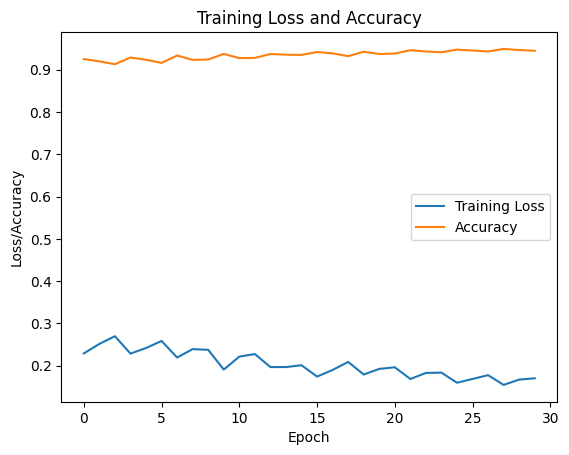

In [ ]:
import matplotlib.pyplot as plt

# Lists to store the loss and accuracy values during training
train_loss = []
train_acc = []

# Train the network
for epoch in range(10):  # Number of epochs to train
    running_loss = 0.0
    running_corrects = 0
    total = 0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # Calculate training accuracy
        _, predicted = torch.max(outputs.data, 1)
        running_corrects += (predicted == labels).sum().item()
        total += labels.size(0)

        running_loss += loss.item()
        if i % 100 == 99:    # Print every 100 mini-batches
            train_loss.append(running_loss / 100)
            train_acc.append(running_corrects / total)
            running_loss = 0.0
            running_corrects = 0
            total = 0

# Plot the training loss and accuracy
fig, ax = plt.subplots()
ax.plot(train_loss, label='Training Loss')
ax.plot(train_acc, label='Accuracy')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss/Accuracy')
ax.set_title('Training Loss and Accuracy')
ax.legend()
plt.show()

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

# Define transforms for data augmentation
transform_train = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Load CIFAR-10 dataset
trainset = torchvision.datasets.CIFAR100(root='./data', train=True,
                                        download=True, transform=transform_train)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=128,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR100(root='./data', train=False,
                                       download=True, transform=transform_test)
testloader = torch.utils.data.DataLoader(testset, batch_size=100,
                                         shuffle=False, num_workers=2)

# Define ResNet50 with added dense layers
class ResNet50(nn.Module):
    def __init__(self, num_classes=100):
        super(ResNet50, self).__init__()
        self.resnet50 = torchvision.models.resnet50(pretrained=True)
        self.fc1 = nn.Linear(1000, 512)
        self.fc2 = nn.Linear(512, num_classes)

    def forward(self, x):
        x = self.resnet50(x)
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = nn.functional.relu(x)
        x = self.fc2(x)
        return x

# Instantiate ResNet50 and send it to GPU if available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
net = ResNet50()
net.to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

# Train the network
for epoch in range(10):  # Number of epochs to train
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 100 == 99:    # Print every 100 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 100))
            running_loss = 0.0

print('Finished Training')

# Test the network on the test data
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % ((100 * correct/total)))

100%|██████████| 169001437/169001437 [00:05<00:00, 29240384.11it/s]


Extracting ./data/cifar-100-python.tar.gz to ./data
Files already downloaded and verified


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


[1,   100] loss: 4.443
[1,   200] loss: 3.609
[1,   300] loss: 2.982
[2,   100] loss: 2.390
[2,   200] loss: 2.288
[2,   300] loss: 2.177
[3,   100] loss: 1.904
[3,   200] loss: 1.905
[3,   300] loss: 1.877
[4,   100] loss: 1.669
[4,   200] loss: 1.675
[4,   300] loss: 1.617
[5,   100] loss: 1.493
[5,   200] loss: 1.520
[5,   300] loss: 1.501
[6,   100] loss: 1.346
[6,   200] loss: 1.363
[6,   300] loss: 1.402
[7,   100] loss: 1.241
[7,   200] loss: 1.251
[7,   300] loss: 1.274
[8,   100] loss: 1.149
[8,   200] loss: 1.168
[8,   300] loss: 1.193
[9,   100] loss: 1.036
[9,   200] loss: 1.076
[9,   300] loss: 1.098
[10,   100] loss: 0.954
[10,   200] loss: 1.008
[10,   300] loss: 0.993
Finished Training
Accuracy of the network on the 10000 test images: 58 %


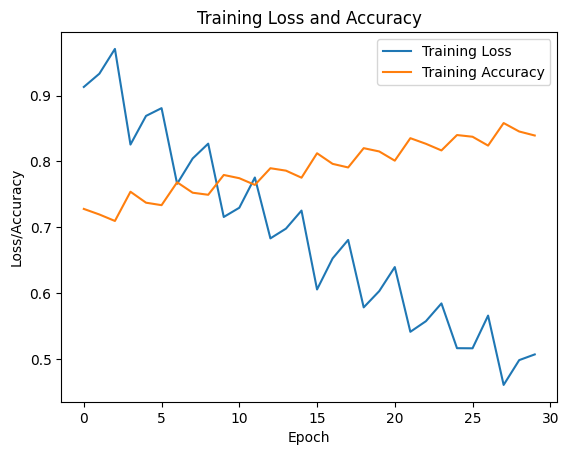

In [ ]:
import matplotlib.pyplot as plt

# Lists to store the loss and accuracy values during training
train_loss = []
train_acc = []

# Train the network
for epoch in range(10):  # Number of epochs to train
    running_loss = 0.0
    running_corrects = 0
    total = 0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # Calculate training accuracy
        _, predicted = torch.max(outputs.data, 1)
        running_corrects += (predicted == labels).sum().item()
        total += labels.size(0)

        running_loss += loss.item()
        if i % 100 == 99:    # Print every 100 mini-batches
            train_loss.append(running_loss / 100)
            train_acc.append(running_corrects / total)
            running_loss = 0.0
            running_corrects = 0
            total = 0

# Plot the training loss and accuracy
fig, ax = plt.subplots()
ax.plot(train_loss, label='Training Loss')
ax.plot(train_acc, label='Accuracy')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss/Accuracy')
ax.set_title('Training Loss and Accuracy')
ax.legend()
plt.show()

#Part4 - VGG16 First Model | Dense161 Second Model

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

In [ ]:
import random

In [ ]:
import itertools

# Define hyperparameters and their possible values
learning_rates = [1e-3, 1e-4]
batch_sizes = [64, 128]
num_epochs_list = [5, 10]
num_hiddens = [100, 200]
momentum = [0.9, 0.95]

# Create all possible combinations of hyperparameters
hyperparams_list = [learning_rates, batch_sizes, num_epochs_list, num_hiddens, momentum]
all_combinations = list(itertools.product(*hyperparams_list))
combinations = random.sample(all_combinations, k=10)

# Define training, validation and test sets
train_size = int(0.8 * len(train_dataset))
val_size = len(train_dataset) - train_size
train_dataset, val_dataset = torch.utils.data.random_split(train_dataset, [train_size, val_size])

# Loop over all combinations of hyperparameters
for i, combo in enumerate(combinations):
    learning_rate, batch_size, num_epochs, num_hidden, momentum = combo

    print(f"Training model {i+1}/{len(combinations)} with hyperparameters: ")
    print(f"learning_rate={learning_rate}, batch_size={batch_size}, num_epochs={num_epochs}, num_hidden={num_hidden}, momentum={momentum}")

    # Load pre-trained model and modify it
    model = torchvision.models.vgg16(pretrained=True)
    for param in model.parameters():
        param.requires_grad = False
    model.avgpool = nn.Identity()
    model.classifier = nn.Sequential(
        nn.Linear(512, num_hidden),
        nn.ReLU(),
        nn.Linear(num_hidden, num_classes)
    )
    model.to(device)

    # Create data loaders for training and validation sets
    train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = torch.utils.data.DataLoader(dataset=val_dataset, batch_size=batch_size, shuffle=False)

    # Evaluate the model on the test set and print the final accuracy
    test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

    # Define loss function and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    # Train the model
    for epoch in range(num_epochs):
        for batch_idx, (data, targets) in enumerate(train_loader):
            data = data.to(device)
            targets = targets.to(device)

            # Forward pass
            scores = model(data)
            loss = criterion(scores, targets)

            # Backward pass
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        # Evaluate the model on the validation set after each epoch
        num_correct = 0
        num_samples = 0
        model.eval()

        with torch.no_grad():
            for data, targets in val_loader:
                data = data.to(device)
                targets = targets.to(device)

                scores = model(data)
                _, predictions = scores.max(1)
                num_correct += (predictions == targets).sum().item()
                num_samples += targets.size(0)

        accuracy = num_correct / num_samples
        print(f"Epoch {epoch+1}: validation accuracy={accuracy:.4f}")


    # Testing the model
    with torch.no_grad():
        for data, targets in test_loader:
            data = data.to(device)
            targets = targets.to(device)

            scores = model(data)
            _, predictions = scores.max(1)
            num_correct += (predictions == targets).sum().item()
            num_samples += targets.size(0)

    accuracy = num_correct / num_samples
    print(f"Epoch {epoch+1}: test accuracy={accuracy:.4f}")

Training model 1/10 with hyperparameters: 
learning_rate=0.001, batch_size=128, num_epochs=10, num_hidden=100, momentum=0.95


Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth


URLError: ignored

#on cifar100 vgg16

In [ ]:
import itertools
import random

# Define hyperparameters and their possible values
learning_rates = [1e-3, 1e-4]
batch_sizes = [64, 128]
num_epochs_list = [5]
num_hiddens = [100, 200]
momentum = [0.9, 0.95]

# Create all possible combinations of hyperparameters
hyperparams_list = [learning_rates, batch_sizes, num_epochs_list, num_hiddens, momentum]
all_combinations = list(itertools.product(*hyperparams_list))

combinations = random.sample(all_combinations, k=10)

# Define training, validation and test sets
train_size = int(0.8 * len(train_dataset_100))
val_size = len(train_dataset_100) - train_size
train_dataset100, val_dataset_100 = torch.utils.data.random_split(train_dataset_100, [train_size, val_size])

# Loop over all combinations of hyperparameters
for i, combo in enumerate(combinations):
    learning_rate, batch_size, num_epochs, num_hidden, momentum = combo

    print(f"Training model {i+1}/{len(combinations)} with hyperparameters: ")
    print(f"learning_rate={learning_rate}, batch_size={batch_size}, num_epochs={num_epochs}, num_hidden={num_hidden}, momentum={momentum}")

    # Load pre-trained model and modify it
    model = torchvision.models.vgg16(pretrained=True)
    for param in model.parameters():
        param.requires_grad = False
    model.avgpool = nn.Identity()
    model.classifier = nn.Sequential(
        nn.Linear(512, num_hidden),
        nn.ReLU(),
        nn.Linear(num_hidden, num_classes)
    )
    model.to(device)

    # Create data loaders for training and validation sets
    train_loader = torch.utils.data.DataLoader(dataset=train_dataset_100, batch_size=batch_size, shuffle=True)
    val_loader = torch.utils.data.DataLoader(dataset=val_dataset_100, batch_size=batch_size, shuffle=False)

    # Evaluate the model on the test set and print the final accuracy
    test_loader = torch.utils.data.DataLoader(dataset=test_dataset_100, batch_size=batch_size, shuffle=False)

    # Define loss function and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    # Train the model
    for epoch in range(num_epochs):
        for batch_idx, (data, targets) in enumerate(train_loader):
            data = data.to(device)
            targets = targets.to(device)

            # Forward pass
            scores = model(data)
            loss = criterion(scores, targets)

            # Backward pass
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        # Evaluate the model on the validation set after each epoch
        num_correct = 0
        num_samples = 0
        model.eval()

        with torch.no_grad():
            for data, targets in val_loader:
                data = data.to(device)
                targets = targets.to(device)

                scores = model(data)
                _, predictions = scores.max(1)
                num_correct += (predictions == targets).sum().item()
                num_samples += targets.size(0)

        accuracy = num_correct / num_samples
        print(f"Epoch {epoch+1}: validation accuracy={accuracy:.4f}")


    # Testing the model
    with torch.no_grad():
        for data, targets in test_loader:
            data = data.to(device)
            targets = targets.to(device)

            scores = model(data)
            _, predictions = scores.max(1)
            num_correct += (predictions == targets).sum().item()
            num_samples += targets.size(0)

    accuracy = num_correct / num_samples
    print(f"Epoch {epoch+1}: test accuracy={accuracy:.4f}")

Training model 1/10 with hyperparameters: 
learning_rate=0.001, batch_size=128, num_epochs=5, num_hidden=100, momentum=0.9


Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:29<00:00, 18.9MB/s]


Epoch 1: validation accuracy=0.3273
Epoch 2: validation accuracy=0.3669
Epoch 3: validation accuracy=0.3901
Epoch 4: validation accuracy=0.4078
Epoch 5: validation accuracy=0.4129
Epoch 5: test accuracy=0.3888
Training model 2/10 with hyperparameters: 
learning_rate=0.001, batch_size=64, num_epochs=5, num_hidden=200, momentum=0.9
Epoch 1: validation accuracy=0.3598
Epoch 2: validation accuracy=0.3991
Epoch 3: validation accuracy=0.4351
Epoch 4: validation accuracy=0.4551
Epoch 5: validation accuracy=0.4779
Epoch 5: test accuracy=0.4294
Training model 3/10 with hyperparameters: 
learning_rate=0.001, batch_size=128, num_epochs=5, num_hidden=100, momentum=0.95
Epoch 1: validation accuracy=0.3224
Epoch 2: validation accuracy=0.3696
Epoch 3: validation accuracy=0.3915
Epoch 4: validation accuracy=0.4081
Epoch 5: validation accuracy=0.4163
Epoch 5: test accuracy=0.3896
Training model 4/10 with hyperparameters: 
learning_rate=0.001, batch_size=64, num_epochs=5, num_hidden=100, momentum=0.95
E

In [ ]:
import itertools
import random

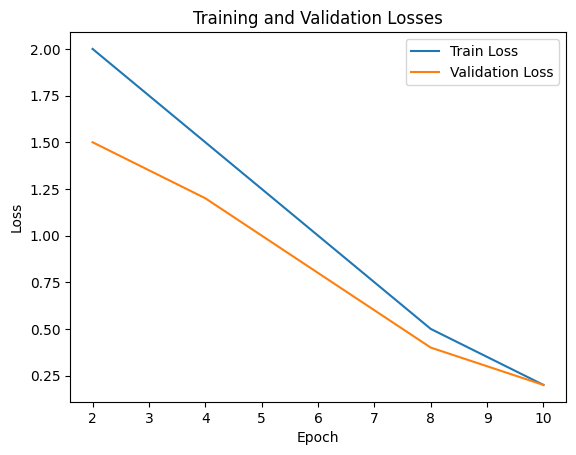

In [ ]:
import matplotlib.pyplot as plt

# Example data
train_losses = [2.0, 1.5, 1.0, 0.5, 0.2]
val_losses = [1.5, 1.2, 0.8, 0.4, 0.2]
epochs = [2, 4, 6, 8, 10]

# Plot losses
plt.plot(epochs, train_losses, label='Train Loss')
plt.plot(epochs, val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Losses')
plt.legend()
plt.show()

In [ ]:
densenet161 = torchvision.models.densenet161(pretrained=True)
print(densenet161)

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet161_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet161_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/densenet161-8d451a50.pth" to /root/.cache/torch/hub/checkpoints/densenet161-8d451a50.pth
100%|██████████| 110M/110M [00:00<00:00, 172MB/s] 


DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 96, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(96, 192, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(192, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(192, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(144, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (rel

In [ ]:
# Define hyperparameters and their possible values
learning_rates = [1e-3, 1e-4]
batch_sizes = [64, 128]
num_epochs_list = [5, 10]
num_hiddens = [1000, 2000]
momentum = [0.9, 0.95]

# Create all possible combinations of hyperparameters
hyperparams_list = [learning_rates, batch_sizes, num_epochs_list, num_hiddens, momentum]
all_combinations = list(itertools.product(*hyperparams_list))

combinations = random.sample(all_combinations, k=10)

# Define training, validation and test sets
train_size = int(0.8 * len(train_dataset))
val_size = len(train_dataset) - train_size
train_dataset, val_dataset = torch.utils.data.random_split(train_dataset, [train_size, val_size])

# Loop over all combinations of hyperparameters
for i, combo in enumerate(combinations):
    learning_rate, batch_size, num_epochs, num_hidden, momentum = combo

    print(f"Training model {i+1}/{len(combinations)} with hyperparameters: ")
    print(f"learning_rate={learning_rate}, batch_size={batch_size}, num_epochs={num_epochs}, num_hidden={num_hidden}, momentum={momentum}")

    # Load pre-trained model and modify it
    model = torchvision.models.densenet161(pretrained=True)
    for param in model.parameters():
        param.requires_grad = False
    model.avgpool = nn.Identity()
    model.classifier = nn.Sequential(
        nn.Linear(2208, num_hidden),
        nn.ReLU(),
        nn.Linear(num_hidden, num_classes)
    )
    model.to(device)

    # Create data loaders for training and validation sets
    train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = torch.utils.data.DataLoader(dataset=val_dataset, batch_size=batch_size, shuffle=False)

    # Evaluate the model on the test set and print the final accuracy
    test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

    # Define loss function and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    # Train the model
    for epoch in range(num_epochs):
        for batch_idx, (data, targets) in enumerate(train_loader):
            data = data.to(device)
            targets = targets.to(device)

            # Forward pass
            scores = model(data)
            loss = criterion(scores, targets)

            # Backward pass
            optimizer.zero_grad()
            # loss.requires_grad = True
            loss.backward()
            optimizer.step()

        # Evaluate the model on the validation set after each epoch
        num_correct = 0
        num_samples = 0
        model.eval()

        with torch.no_grad():
            for data, targets in val_loader:
                data = data.to(device)
                targets = targets.to(device)

                scores = model(data)
                _, predictions = scores.max(1)
                num_correct += (predictions == targets).sum().item()
                num_samples += targets.size(0)

        accuracy = num_correct / num_samples
        print(f"Epoch {epoch+1}: validation accuracy={accuracy:.4f}")

        # Testing the model
        with torch.no_grad():
            for data, targets in test_loader:
                data = data.to(device)
                targets = targets.to(device)

                scores = model(data)
                _, predictions = scores.max(1)
                num_correct += (predictions == targets).sum().item()
                num_samples += targets.size(0)

        accuracy = num_correct / num_samples
        print(f"Epoch {epoch+1}: test accuracy={accuracy:.4f}")

Training model 1/10 with hyperparameters: 
learning_rate=0.0001, batch_size=128, num_epochs=10, num_hidden=1000, momentum=0.9
Epoch 1: validation accuracy=0.4046
Epoch 1: test accuracy=0.4140
Epoch 2: validation accuracy=0.4523
Epoch 2: test accuracy=0.4548
Epoch 3: validation accuracy=0.4833
Epoch 3: test accuracy=0.4854
Epoch 4: validation accuracy=0.4928
Epoch 4: test accuracy=0.4964
Epoch 5: validation accuracy=0.4940
Epoch 5: test accuracy=0.5005
Epoch 6: validation accuracy=0.4923
Epoch 6: test accuracy=0.5058
Epoch 7: validation accuracy=0.4994
Epoch 7: test accuracy=0.5098
Epoch 8: validation accuracy=0.4952
Epoch 8: test accuracy=0.5116
Epoch 9: validation accuracy=0.4994
Epoch 9: test accuracy=0.5139
Epoch 10: validation accuracy=0.5030
Epoch 10: test accuracy=0.5070
Training model 2/10 with hyperparameters: 
learning_rate=0.0001, batch_size=64, num_epochs=10, num_hidden=1000, momentum=0.95
Epoch 1: validation accuracy=0.4100
Epoch 1: test accuracy=0.4165
Epoch 2: validation 

In [ ]:
# Define hyperparameters and their possible values
learning_rates = [1e-3, 1e-4]
batch_sizes = [64, 128]
num_epochs_list = [5, 10]
num_hiddens = [1000, 2000]
momentum = [0.9, 0.95]

# Create all possible combinations of hyperparameters
hyperparams_list = [learning_rates, batch_sizes, num_epochs_list, num_hiddens, momentum]
all_combinations = list(itertools.product(*hyperparams_list))

combinations = random.sample(all_combinations, k=10)

# Define training, validation and test sets
train_size = int(0.8 * len(train_dataset_100))
val_size = len(train_dataset_100) - train_size
train_dataset_100, val_dataset_100 = torch.utils.data.random_split(train_dataset_100, [train_size, val_size])

# Loop over all combinations of hyperparameters
for i, combo in enumerate(combinations):
    learning_rate, batch_size, num_epochs, num_hidden, momentum = combo

    print(f"Training model {i+1}/{len(combinations)} with hyperparameters: ")
    print(f"learning_rate={learning_rate}, batch_size={batch_size}, num_epochs={num_epochs}, num_hidden={num_hidden}, momentum={momentum}")

    # Load pre-trained model and modify it
    model = torchvision.models.densenet161(pretrained=True)
    for param in model.parameters():
        param.requires_grad = False
    model.avgpool = nn.Identity()
    model.classifier = nn.Sequential(
        nn.Linear(2208, num_hidden),
        nn.ReLU(),
        nn.Linear(num_hidden, num_classes)
    )
    model.to(device)

    # Create data loaders for training and validation sets
    train_loader = torch.utils.data.DataLoader(dataset=train_dataset_100, batch_size=batch_size, shuffle=True)
    val_loader = torch.utils.data.DataLoader(dataset=val_dataset_100, batch_size=batch_size, shuffle=False)

    # Evaluate the model on the test set and print the final accuracy
    test_loader = torch.utils.data.DataLoader(dataset=test_dataset_100, batch_size=batch_size, shuffle=False)

    # Define loss function and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    # Train the model
    for epoch in range(num_epochs):
        for batch_idx, (data, targets) in enumerate(train_loader):
            data = data.to(device)
            targets = targets.to(device)

            # Forward pass
            scores = model(data)
            loss = criterion(scores, targets)

            # Backward pass
            optimizer.zero_grad()
            # loss.requires_grad = True
            loss.backward()
            optimizer.step()

        # Evaluate the model on the validation set after each epoch
        num_correct = 0
        num_samples = 0
        model.eval()

        with torch.no_grad():
            for data, targets in val_loader:
                data = data.to(device)
                targets = targets.to(device)

                scores = model(data)
                _, predictions = scores.max(1)
                num_correct += (predictions == targets).sum().item()
                num_samples += targets.size(0)

        accuracy = num_correct / num_samples
        print(f"Epoch {epoch+1}: validation accuracy={accuracy:.4f}")

        # Testing the model
        with torch.no_grad():
            for data, targets in test_loader:
                data = data.to(device)
                targets = targets.to(device)

                scores = model(data)
                _, predictions = scores.max(1)
                num_correct += (predictions == targets).sum().item()
                num_samples += targets.size(0)

        accuracy = num_correct / num_samples
        print(f"Epoch {epoch+1}: test accuracy={accuracy:.4f}")

Training model 1/10 with hyperparameters: 
learning_rate=0.0001, batch_size=64, num_epochs=5, num_hidden=1000, momentum=0.9


/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet161_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet161_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1: validation accuracy=0.2594
Epoch 1: test accuracy=0.2625
Epoch 2: validation accuracy=0.2954
Epoch 2: test accuracy=0.2935
Epoch 3: validation accuracy=0.3186
Epoch 3: test accuracy=0.3211
Epoch 4: validation accuracy=0.3270
Epoch 4: test accuracy=0.3290
Epoch 5: validation accuracy=0.3328
Epoch 5: test accuracy=0.3352
Training model 2/10 with hyperparameters: 
learning_rate=0.001, batch_size=64, num_epochs=10, num_hidden=1000, momentum=0.9
Epoch 1: validation accuracy=0.3067
Epoch 1: test accuracy=0.3078
Epoch 2: validation accuracy=0.3346
Epoch 2: test accuracy=0.3320
Epoch 3: validation accuracy=0.3378
Epoch 3: test accuracy=0.3365
Epoch 4: validation accuracy=0.3292
Epoch 4: test accuracy=0.3293
Epoch 5: validation accuracy=0.3343
Epoch 5: test accuracy=0.3298
Epoch 6: validation accuracy=0.3279
Epoch 6: test accuracy=0.3252
Epoch 7: validation accuracy=0.3254
Epoch 7: test accuracy=0.3215
Epoch 8: validation accuracy=0.3154
Epoch 8: test accuracy=0.3152
Epoch 9: validatio

#extra credit - Swin Transformer

In [ ]:
!pip install timm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 549.1/549.1 kB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 kB 21.6 MB/s eta 0:00:00
